In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [557]:
df = pd.read_csv('polo_data.csv')

# Data Cleaning

In [558]:
print(df.shape)
df.head()

(6731, 8)


,model,ad_title,year,km,color,price,ad_date,location
0,\n 1.0 TSI Highline,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n sahibinden...,2017,26.0,\n Beyaz,\n 133.000 TL,\n24 Nisan\n\n2019\n,\n AğrıMerkez
1,\n 1.0 TSI Highline,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n GARANTİLİ ...,2018,11.0,\n Bej,\n 135.000 TL,\n02 Eylül\n\n2019\n,\n İstanbulKağıthane
2,\n 1.6,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n VW POLO 1....,1997,260.0,\n Siyah,\n 32.500 TL,\n06 Eylül\n\n2019\n,\n AnkaraAltındağ
3,\n 1.6 TDi Comfortline,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n İLK SAHİBİ...,2013,42.5,\n Beyaz,\n 88.750 TL,\n17 Eylül\n\n2019\n,\n AnkaraÇankaya
4,\n 1.4 TSI GTi,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n 2013 CTH 4...,2013,45.0,\n Kırmızı,\n 130.000 TL,\n03 Ekim\n\n2019\n,\n SamsunAtakum


New line indicators (\n) needs to removed. I will use pandas remove() function with regex parameter set True. Similarly TL representing Turkish currency in price cell should be removed to be able make numerical analysis.

In [559]:
df = df.replace('\n','',regex=True) #remove \n in cells

In [560]:
df.price = df.price.replace('TL','',regex=True) #remove TL in cells of price column

In [561]:
df.head()

,model,ad_title,year,km,color,price,ad_date,location
0,1.0 TSI Highline,sahibinden 2017 polo,2017,26.0,Beyaz,133.000,24 Nisan2019,AğrıMerkez
1,1.0 TSI Highline,GARANTİLİ 2018 POLO HIGHLINE,2018,11.0,Bej,135.000,02 Eylül2019,İstanbulKağıthane
2,1.6,VW POLO 1.6 KLİMALI DERİ DÖŞEME DÖNEMİNİN ...,1997,260.0,Siyah,32.500,06 Eylül2019,AnkaraAltındağ
3,1.6 TDi Comfortline,İLK SAHİBİNDEN TEMİZ POLO 1.6 TDI 90HP,2013,42.5,Beyaz,88.750,17 Eylül2019,AnkaraÇankaya
4,1.4 TSI GTi,2013 CTH 45000KM KIRMIZI POLO GTİ,2013,45.0,Kırmızı,130.000,03 Ekim2019,SamsunAtakum


In [562]:
df.dtypes

model        object
ad_title     object
year          int64
km          float64
color        object
price        object
ad_date      object
location     object
dtype: object

In [563]:
df['ad_title'].nunique()

6243

### ad_date

The data type of date is object. To be able to use the dates properly, I need to convert data dype to datetime. Before using astpye() function, I need to change the name of months to English.

In [564]:
months = {"Ocak":"January", "Şubat":"February", "Mart":"March", "Nisan":"April",
          "Mayıs":"May", "Haziran":"June","Temmuz":"July","Ağustos":"August",
          "Eylül":"September", "Ekim":"October", "Kasım":"November", "Aralık":"December"}

In [565]:
df.ad_date = df.ad_date.replace(months, regex=True)

In [566]:
df.head()

,model,ad_title,year,km,color,price,ad_date,location
0,1.0 TSI Highline,sahibinden 2017 polo,2017,26.0,Beyaz,133.000,24 April2019,AğrıMerkez
1,1.0 TSI Highline,GARANTİLİ 2018 POLO HIGHLINE,2018,11.0,Bej,135.000,02 September2019,İstanbulKağıthane
2,1.6,VW POLO 1.6 KLİMALI DERİ DÖŞEME DÖNEMİNİN ...,1997,260.0,Siyah,32.500,06 September2019,AnkaraAltındağ
3,1.6 TDi Comfortline,İLK SAHİBİNDEN TEMİZ POLO 1.6 TDI 90HP,2013,42.5,Beyaz,88.750,17 September2019,AnkaraÇankaya
4,1.4 TSI GTi,2013 CTH 45000KM KIRMIZI POLO GTİ,2013,45.0,Kırmızı,130.000,03 October2019,SamsunAtakum


In [567]:
df.ad_date = pd.to_datetime(df.ad_date)

In [568]:
df.head()

,model,ad_title,year,km,color,price,ad_date,location
0,1.0 TSI Highline,sahibinden 2017 polo,2017,26.0,Beyaz,133.000,2019-04-24,AğrıMerkez
1,1.0 TSI Highline,GARANTİLİ 2018 POLO HIGHLINE,2018,11.0,Bej,135.000,2019-09-02,İstanbulKağıthane
2,1.6,VW POLO 1.6 KLİMALI DERİ DÖŞEME DÖNEMİNİN ...,1997,260.0,Siyah,32.500,2019-09-06,AnkaraAltındağ
3,1.6 TDi Comfortline,İLK SAHİBİNDEN TEMİZ POLO 1.6 TDI 90HP,2013,42.5,Beyaz,88.750,2019-09-17,AnkaraÇankaya
4,1.4 TSI GTi,2013 CTH 45000KM KIRMIZI POLO GTİ,2013,45.0,Kırmızı,130.000,2019-10-03,SamsunAtakum


### km and price

km column is truncated while reading the csv file. It is because of 'dot' used in thousands. For example, 25.000 which is twenty five thousands detected as 25.0. To fix this issue, I will simply multiply 'km' column with 1000.

In [569]:
df.km = df.km * 1000

In [570]:
df.head()

,model,ad_title,year,km,color,price,ad_date,location
0,1.0 TSI Highline,sahibinden 2017 polo,2017,26000.0,Beyaz,133.000,2019-04-24,AğrıMerkez
1,1.0 TSI Highline,GARANTİLİ 2018 POLO HIGHLINE,2018,11000.0,Bej,135.000,2019-09-02,İstanbulKağıthane
2,1.6,VW POLO 1.6 KLİMALI DERİ DÖŞEME DÖNEMİNİN ...,1997,260000.0,Siyah,32.500,2019-09-06,AnkaraAltındağ
3,1.6 TDi Comfortline,İLK SAHİBİNDEN TEMİZ POLO 1.6 TDI 90HP,2013,42500.0,Beyaz,88.750,2019-09-17,AnkaraÇankaya
4,1.4 TSI GTi,2013 CTH 45000KM KIRMIZI POLO GTİ,2013,45000.0,Kırmızı,130.000,2019-10-03,SamsunAtakum


Due to 'dot' used in prices, I could not change the data type to int or float so I will remove the 'dot' first.

In [571]:
df.iloc[:,5] = df.iloc[:,5].str.replace(r'.','')

In [572]:
df.iloc[:,5] = df.iloc[:,5].str.replace(r',','') # in some cells ',' used

In [573]:
df.head()

,model,ad_title,year,km,color,price,ad_date,location
0,1.0 TSI Highline,sahibinden 2017 polo,2017,26000.0,Beyaz,133000,2019-04-24,AğrıMerkez
1,1.0 TSI Highline,GARANTİLİ 2018 POLO HIGHLINE,2018,11000.0,Bej,135000,2019-09-02,İstanbulKağıthane
2,1.6,VW POLO 1.6 KLİMALI DERİ DÖŞEME DÖNEMİNİN ...,1997,260000.0,Siyah,32500,2019-09-06,AnkaraAltındağ
3,1.6 TDi Comfortline,İLK SAHİBİNDEN TEMİZ POLO 1.6 TDI 90HP,2013,42500.0,Beyaz,88750,2019-09-17,AnkaraÇankaya
4,1.4 TSI GTi,2013 CTH 45000KM KIRMIZI POLO GTİ,2013,45000.0,Kırmızı,130000,2019-10-03,SamsunAtakum


In [574]:
df.price = df.price.astype('float64')

In [575]:
df.dtypes

model               object
ad_title            object
year                 int64
km                 float64
color               object
price              float64
ad_date     datetime64[ns]
location            object
dtype: object

### Missing values

In [576]:
df.isna().any()

model       False
ad_title    False
year        False
km          False
color       False
price       False
ad_date     False
location    False
dtype: bool

There is no missing value in the dataframe.

### Location

In Turkey, location might be a factor in determining the price of a used car. Location data in our dataframe inclused city and district. I don't think a cars price change in different districts of the same city. Therefore, I will modify location data to include only the name of the city.

In [577]:
df.location.nunique()

502

In [578]:
df.ad_title.nunique()

6243

In [451]:
import re

In [579]:
s = df['location']

In [580]:
len(s)

6731

In [581]:
city_district = []
for i in range(0,6731):
    city_district.append(re.sub( r"([A-Z, 'Ç', 'İ', 'Ö', 'Ş', 'Ü'])", r" \1", s[i]).split()) #add letters specific to Turkish alphabet

In [582]:
city_district[:5]

[['Ağrı', 'Merkez'],
 ['İstanbul', 'Kağıthane'],
 ['Ankara', 'Altındağ'],
 ['Ankara', 'Çankaya'],
 ['Samsun', 'Atakum']]

In [583]:
len(city_district)

6731

In [584]:
city = []
for i in range(0,6731):
    city.append(city_district[i][0])

In [585]:
city[:5]

['Ağrı', 'İstanbul', 'Ankara', 'Ankara', 'Samsun']

In [586]:
len(city)

6731

In [587]:
df['city'] = city

In [588]:
df.head()

,model,ad_title,year,km,color,price,ad_date,location,city
0,1.0 TSI Highline,sahibinden 2017 polo,2017,26000.0,Beyaz,133000.0,2019-04-24,AğrıMerkez,Ağrı
1,1.0 TSI Highline,GARANTİLİ 2018 POLO HIGHLINE,2018,11000.0,Bej,135000.0,2019-09-02,İstanbulKağıthane,İstanbul
2,1.6,VW POLO 1.6 KLİMALI DERİ DÖŞEME DÖNEMİNİN ...,1997,260000.0,Siyah,32500.0,2019-09-06,AnkaraAltındağ,Ankara
3,1.6 TDi Comfortline,İLK SAHİBİNDEN TEMİZ POLO 1.6 TDI 90HP,2013,42500.0,Beyaz,88750.0,2019-09-17,AnkaraÇankaya,Ankara
4,1.4 TSI GTi,2013 CTH 45000KM KIRMIZI POLO GTİ,2013,45000.0,Kırmızı,130000.0,2019-10-03,SamsunAtakum,Samsun


In [589]:
df.city.nunique()

81

Successful! There are 81 cities in Turkey.

In [464]:
df.to_csv(r'C:\Users\soner\Desktop\Data_Science\Projects\predicting_used_cars_prices\polo_data_cleaned.csv', index=None, header=True)

# Exploratory Data Analysis

### Price

In [590]:
df.price.mean()

83153.7379289853

In [591]:
df.price.median()

64250.0

There is a big difference between mean and median which indicates outliers. So first need to check if there is ubnormal values.

In [592]:
print(df.price.max())
print(df.price.min())

111111111.0
24.0


In [593]:
df.price.sort_values(ascending=False)

1904    111111111.0
458        185000.0
235        175000.0
607        173000.0
806        169750.0
777        169500.0
395        166900.0
943        166500.0
773        166000.0
564        163000.0
755        163000.0
404        162500.0
702        162500.0
797        162000.0
131        162000.0
121        161900.0
394        161750.0
206        161500.0
90         160000.0
680        160000.0
470        159500.0
158        159000.0
40         158400.0
150        157500.0
120        157500.0
809        157500.0
908        157000.0
142        156900.0
643        156000.0
284        156000.0
           ...     
5372        18250.0
6437        18250.0
5762        18250.0
6087        18000.0
5910        18000.0
5543        18000.0
5393        18000.0
6690        18000.0
6668        18000.0
6527        18000.0
6196        17900.0
5929        17900.0
4944        17750.0
5023        17500.0
6151        17500.0
264         17500.0
6410        17500.0
6427        17450.0
4858        17450.0


Highest value and the lowest four values seem ubnormal so I will remove these.

In [594]:
df['price'][1904]

111111111.0

In [595]:
df.drop(1904, inplace=True)

In [596]:
df.price.max()

185000.0

In [597]:
df.drop([6497,5603,4186,5203], inplace=True)

In [598]:
df.price.sort_values(ascending=False)

458     185000.0
235     175000.0
607     173000.0
806     169750.0
777     169500.0
395     166900.0
943     166500.0
773     166000.0
564     163000.0
755     163000.0
702     162500.0
404     162500.0
131     162000.0
797     162000.0
121     161900.0
394     161750.0
206     161500.0
90      160000.0
680     160000.0
470     159500.0
158     159000.0
40      158400.0
150     157500.0
809     157500.0
120     157500.0
908     157000.0
142     156900.0
284     156000.0
643     156000.0
925     155500.0
          ...   
5517     18500.0
5876     18500.0
6082     18500.0
6606     18250.0
5372     18250.0
6437     18250.0
5762     18250.0
5910     18000.0
6668     18000.0
5393     18000.0
6690     18000.0
6527     18000.0
5543     18000.0
6087     18000.0
5929     17900.0
6196     17900.0
4944     17750.0
5023     17500.0
6410     17500.0
264      17500.0
6151     17500.0
6427     17450.0
4858     17450.0
802      17000.0
5561     16750.0
6359     16250.0
2435     15750.0
6290     15500

In [599]:
print(df.price.mean())
print(df.price.median())

66694.66636931311
64275.0


In [600]:
df.price.mode()

0    25000.0
dtype: float64

In [601]:
sns.set(style='darkgrid')

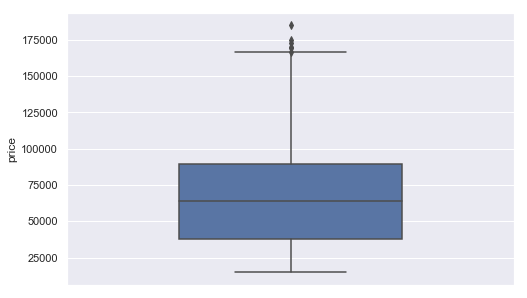

In [485]:
plt.figure(figsize=(8,5))
sns.boxplot(y='price', data=df, width=0.5)

Text(0.5, 1.0, 'Frequency Distribution Plot of Prices')

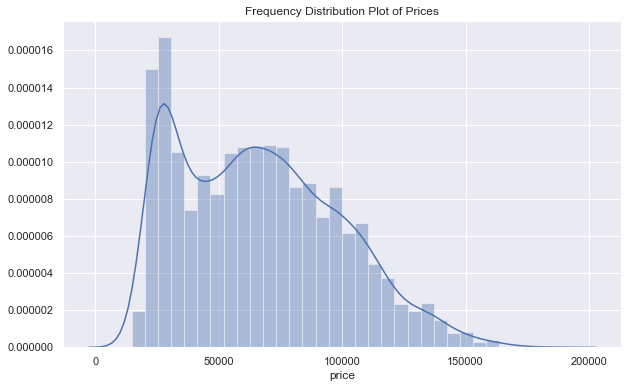

In [482]:
x = df.price
plt.figure(figsize=(10,6))
sns.distplot(x).set_title('Frequency Distribution Plot of Prices')

The graphs above show the frequency distribution of prices. It is slightly right skewed which means there are some outliers with very high prices.

## Date

I don't think date by itself has an effect on the price but waiting periof of the ad on website might have some effect. Longer waiting time might motivate owner to reduce the price. So I will add a columnt indicating the number of days ad has been on the website. Data was scraped on 18.01.2020.

In [602]:
df['ad_duration'] = pd.to_datetime('2020-01-18') - df['ad_date']

In [603]:
df.head()

,model,ad_title,year,km,color,price,ad_date,location,city,ad_duration
0,1.0 TSI Highline,sahibinden 2017 polo,2017,26000.0,Beyaz,133000.0,2019-04-24,AğrıMerkez,Ağrı,269 days
1,1.0 TSI Highline,GARANTİLİ 2018 POLO HIGHLINE,2018,11000.0,Bej,135000.0,2019-09-02,İstanbulKağıthane,İstanbul,138 days
2,1.6,VW POLO 1.6 KLİMALI DERİ DÖŞEME DÖNEMİNİN ...,1997,260000.0,Siyah,32500.0,2019-09-06,AnkaraAltındağ,Ankara,134 days
3,1.6 TDi Comfortline,İLK SAHİBİNDEN TEMİZ POLO 1.6 TDI 90HP,2013,42500.0,Beyaz,88750.0,2019-09-17,AnkaraÇankaya,Ankara,123 days
4,1.4 TSI GTi,2013 CTH 45000KM KIRMIZI POLO GTİ,2013,45000.0,Kırmızı,130000.0,2019-10-03,SamsunAtakum,Samsun,107 days


In [604]:
df['ad_duration'].isna().any()

False

In [605]:
df.ad_duration = df.ad_duration.astype('str')

In [606]:
df.ad_duration.dtype

dtype('O')

In [607]:
df.ad_duration = df.ad_duration.replace('days','',regex=True)

In [608]:
df.head()

,model,ad_title,year,km,color,price,ad_date,location,city,ad_duration
0,1.0 TSI Highline,sahibinden 2017 polo,2017,26000.0,Beyaz,133000.0,2019-04-24,AğrıMerkez,Ağrı,269 00:00:00.000000000
1,1.0 TSI Highline,GARANTİLİ 2018 POLO HIGHLINE,2018,11000.0,Bej,135000.0,2019-09-02,İstanbulKağıthane,İstanbul,138 00:00:00.000000000
2,1.6,VW POLO 1.6 KLİMALI DERİ DÖŞEME DÖNEMİNİN ...,1997,260000.0,Siyah,32500.0,2019-09-06,AnkaraAltındağ,Ankara,134 00:00:00.000000000
3,1.6 TDi Comfortline,İLK SAHİBİNDEN TEMİZ POLO 1.6 TDI 90HP,2013,42500.0,Beyaz,88750.0,2019-09-17,AnkaraÇankaya,Ankara,123 00:00:00.000000000
4,1.4 TSI GTi,2013 CTH 45000KM KIRMIZI POLO GTİ,2013,45000.0,Kırmızı,130000.0,2019-10-03,SamsunAtakum,Samsun,107 00:00:00.000000000


In [609]:
df.ad_duration[0]

'269  00:00:00.000000000'

In [610]:
df.ad_duration = df.ad_duration.str.split(' ', expand=True)

In [611]:
df.head()

,model,ad_title,year,km,color,price,ad_date,location,city,ad_duration
0,1.0 TSI Highline,sahibinden 2017 polo,2017,26000.0,Beyaz,133000.0,2019-04-24,AğrıMerkez,Ağrı,269
1,1.0 TSI Highline,GARANTİLİ 2018 POLO HIGHLINE,2018,11000.0,Bej,135000.0,2019-09-02,İstanbulKağıthane,İstanbul,138
2,1.6,VW POLO 1.6 KLİMALI DERİ DÖŞEME DÖNEMİNİN ...,1997,260000.0,Siyah,32500.0,2019-09-06,AnkaraAltındağ,Ankara,134
3,1.6 TDi Comfortline,İLK SAHİBİNDEN TEMİZ POLO 1.6 TDI 90HP,2013,42500.0,Beyaz,88750.0,2019-09-17,AnkaraÇankaya,Ankara,123
4,1.4 TSI GTi,2013 CTH 45000KM KIRMIZI POLO GTİ,2013,45000.0,Kırmızı,130000.0,2019-10-03,SamsunAtakum,Samsun,107


In [612]:
df.ad_duration = df.ad_duration.astype('int64')

In [613]:
print(df.ad_duration.mean())
print(df.ad_duration.median())

12.641540291406482
10.0


Text(0.5, 1.0, 'Frequency Distribution Plot of Ad Duration')

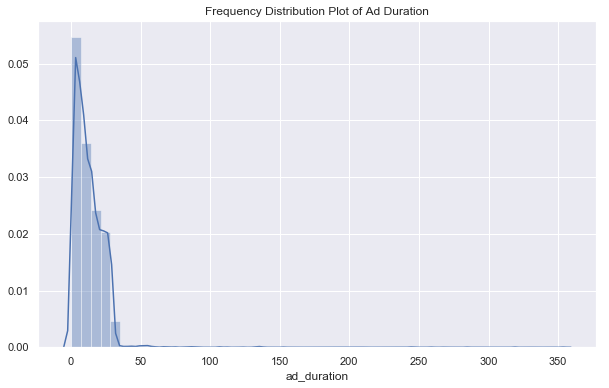

In [614]:
d = df.ad_duration
plt.figure(figsize=(10,6))
sns.distplot(d).set_title('Frequency Distribution Plot of Ad Duration')

In [615]:
e = d[d<50]

Text(0.5, 1.0, 'Frequency Distribution Plot of Ad Duration (<50)')

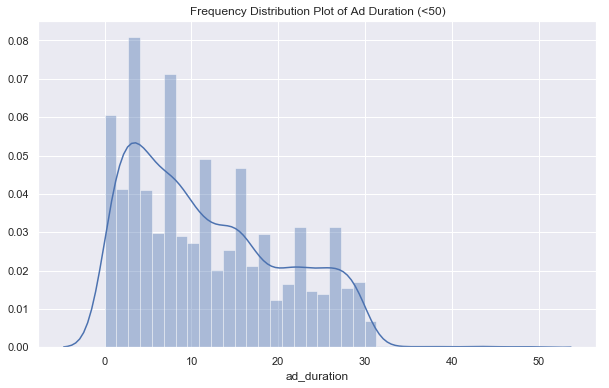

In [616]:
plt.figure(figsize=(10,6))
sns.distplot(e).set_title('Frequency Distribution Plot of Ad Duration (<50)')

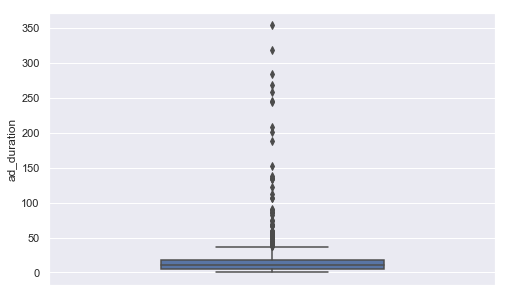

In [617]:
plt.figure(figsize=(8,5))
sns.boxplot(y='ad_duration', data=df, width=0.5)

## Location

In [618]:
df[['price','city']].groupby(['city']).mean().sort_values(by='price', ascending=False).head()

,price
city,
Gümüşhane,85500.000000
Artvin,81791.666667
Ordu,79742.307692
İstanbul,76722.538165
Tunceli,75500.000000


In [619]:
a = df.city.value_counts()[:10]

In [620]:
df.city.value_counts()[:10].sum()

4181

In [621]:
df.city.value_counts().sum()

6726

In [622]:
df_location = pd.DataFrame({"count": a , "share": a/6726})

In [623]:
df_location

,count,share
İstanbul,1559,0.231787
Ankara,648,0.096343
Antalya,466,0.069283
İzmir,434,0.064526
Bursa,244,0.036277
Konya,196,0.029141
Adana,167,0.024829
Kocaeli,164,0.024383
Kayseri,163,0.024234
Gaziantep,140,0.020815


In [624]:
df_location.share.sum()

0.6216176033303599

62% percent of all ads are in top 10 cities.

## Color

In [625]:
df.color.value_counts()

                    Beyaz         3516
                    Kırmızı        774
                    Siyah          574
                    Gümüş Gri      450
                    Mavi           445
                    Gri            348
                    Lacivert       174
                    Yeşil          165
                    Füme           138
                    Bordo           74
                    Turuncu         16
                    Bej             15
                    Mor             13
                    Sarı             9
                    Kahverengi       8
                    Şampanya         3
                    Turkuaz          3
                    Pembe            1
Name: color, dtype: int64

In [626]:
df.color.value_counts().sum()

6726

In [627]:
c = df.color.value_counts()[:10]

In [628]:
df_color = pd.DataFrame({"count": c , "share": c/6726})
df_color

,count,share
Beyaz,3516,0.522748
Kırmızı,774,0.115076
Siyah,574,0.085340
Gümüş Gri,450,0.066905
Mavi,445,0.066161
Gri,348,0.051740
Lacivert,174,0.025870
Yeşil,165,0.024532
Füme,138,0.020517
Bordo,74,0.011002


In [629]:
df_color.share[:3].sum()

0.7231638418079096

It seems like the optimal choice of color is white for wolkswagen polo. More than half of the cars are white followed by red and black. Top 3 colors cover 72% of all cars.

## Year

In [630]:
df.year.value_counts()[:10]

2016    701
2013    609
2012    608
2015    489
2014    460
2017    455
1998    393
2011    366
1997    312
1999    302
Name: year, dtype: int64

The age of the car definitely effects the prices. However, instead of the model year of the car, it makes more sense to use is as age. So I will substiture 'year' column from current year.

In [631]:
df['age'] = 2020 - df['year']

In [632]:
df.head()

,model,ad_title,year,km,color,price,ad_date,location,city,ad_duration,age
0,1.0 TSI Highline,sahibinden 2017 polo,2017,26000.0,Beyaz,133000.0,2019-04-24,AğrıMerkez,Ağrı,269,3
1,1.0 TSI Highline,GARANTİLİ 2018 POLO HIGHLINE,2018,11000.0,Bej,135000.0,2019-09-02,İstanbulKağıthane,İstanbul,138,2
2,1.6,VW POLO 1.6 KLİMALI DERİ DÖŞEME DÖNEMİNİN ...,1997,260000.0,Siyah,32500.0,2019-09-06,AnkaraAltındağ,Ankara,134,23
3,1.6 TDi Comfortline,İLK SAHİBİNDEN TEMİZ POLO 1.6 TDI 90HP,2013,42500.0,Beyaz,88750.0,2019-09-17,AnkaraÇankaya,Ankara,123,7
4,1.4 TSI GTi,2013 CTH 45000KM KIRMIZI POLO GTİ,2013,45000.0,Kırmızı,130000.0,2019-10-03,SamsunAtakum,Samsun,107,7


Text(0.5, 1.0, 'Frequency Distribution Plot of Age of the Cars')

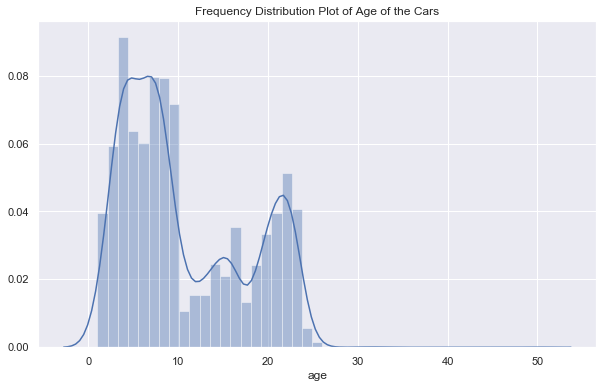

In [633]:
a = df.age
plt.figure(figsize=(10,6))
sns.distplot(a).set_title('Frequency Distribution Plot of Age of the Cars')

## km

In [523]:
print(df.km.mean())
print(df.km.median())

141011.5676479334
137000.0


Text(0.5, 1.0, 'Frequency Distribution Plot of Km')

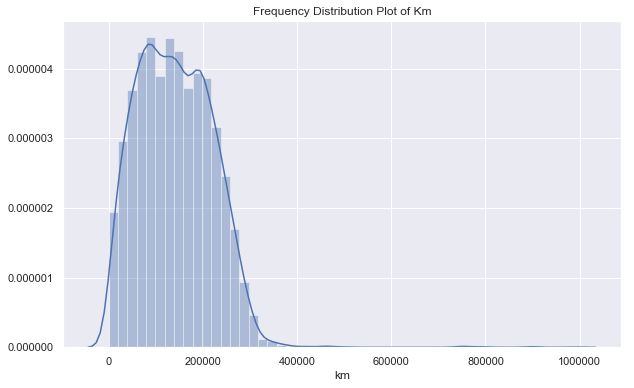

In [524]:
k = df.km
plt.figure(figsize=(10,6))
sns.distplot(k).set_title('Frequency Distribution Plot of Km')

## ad_title

In [279]:
conda install -c https://conda.anaconda.org/conda-forge wordcloud

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\soner\Anaconda3

  added / updated specs:
    - wordcloud


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2019.11.28 |       hecc5488_0         182 KB  conda-forge
    certifi-2019.11.28         |           py37_0         148 KB  conda-forge
    conda-4.8.0                |           py37_1         3.0 MB  conda-forge
    matplotlib-base-3.1.1      |   py37h2852a4a_1         6.6 MB  conda-forge
    openssl-1.1.1d             |       hfa6e2cd_0         4.7 MB  conda-forge
    wordcloud-1.6.0            |   py37hfa6e2cd_0         186 KB  conda-forge
    ------------------------------------------------------------
                                           Total:        14.8 MB

The following NEW packages will be INSTALLED:

  matplotlib-base    conda-forge/win-64::matplotlib-base



==> WARNING: A newer version of conda exists. <==
  current version: 4.7.12
  latest version: 4.8.1

Please update conda by running

    $ conda update -n base -c defaults conda


WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename C:\Users\soner\Anaconda3\Lib\site-packages\matplotlib\mpl-data\fonts\ttf\DejaVuSans.ttf.  Please remove this file manually (you may need to reboot to free file handles)


In [280]:
from wordcloud import WordCloud, STOPWORDS 

In [525]:
len(df.ad_title)

6726

In [526]:
df.ad_title[6726]

'    Kelepir 1997 Model Klimalı POLO'

In [527]:
text_list = list(df.ad_title)

In [528]:
text = '-'.join(text_list)

In [531]:
wordcloud = WordCloud(background_color='white').generate(text)

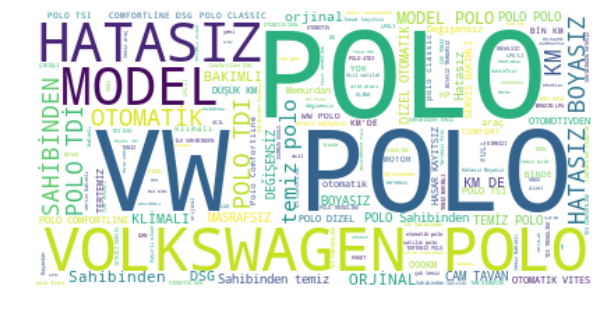

In [532]:
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [536]:
stopwords = ['VW', 'VOLKSWAGEN', 'POLO', 'MODEL', 'KM']

In [537]:
wordcloud = WordCloud(stopwords=stopwords).generate(text)

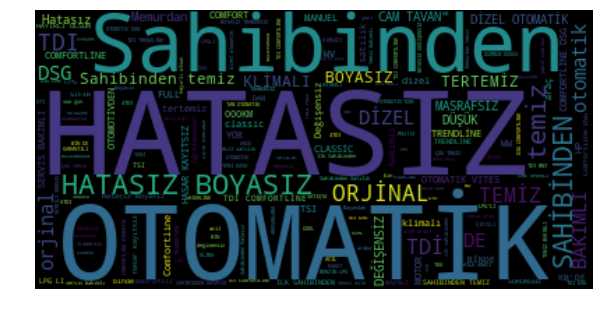

In [538]:
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## model

In [634]:
df.model.value_counts()

                        1.4 TDi Comfortline            966
                        1.4 Comfortline                813
                        1.6                            688
                        1.6 TDi Comfortline            675
                        1.2 TDi Trendline              488
                        1.2 TSI Comfortline            405
                        1.4 TDi Trendline              405
                        1.4 Trendline                  396
                        1.6 Classic                    366
                        1.4 Basicline                  205
                        1.0 TSI Comfortline            165
                        1.0 Trendline                  144
                        1.2 Trendline                  122
                        1.6 Comfortline Classic        102
                        1.0 TSI Highline                95
                        1.2 TSI Lounge                  85
                        1.4 Chrome Edition              

Model column includes three different kinds of information: engine size, fuel type and variant. After checking the values, I found out that only engine size information is complete for all cells. Fuel type and variant are missing for most of the cells so I created a separate column for engine size.

In [635]:
df.model[0]

'                        1.0 TSI Highline '

In [636]:
#remove spaces
df.model = df.model.replace(' ','',regex=True)

In [637]:
engine = [x[:3] for x in df.model]

In [638]:
engine[:5]

['1.0', '1.0', '1.6', '1.6', '1.4']

In [639]:
df['engine'] = engine

In [640]:
df.head()

,model,ad_title,year,km,color,price,ad_date,location,city,ad_duration,age,engine
0,1.0TSIHighline,sahibinden 2017 polo,2017,26000.0,Beyaz,133000.0,2019-04-24,AğrıMerkez,Ağrı,269,3,1.0
1,1.0TSIHighline,GARANTİLİ 2018 POLO HIGHLINE,2018,11000.0,Bej,135000.0,2019-09-02,İstanbulKağıthane,İstanbul,138,2,1.0
2,1.6,VW POLO 1.6 KLİMALI DERİ DÖŞEME DÖNEMİNİN ...,1997,260000.0,Siyah,32500.0,2019-09-06,AnkaraAltındağ,Ankara,134,23,1.6
3,1.6TDiComfortline,İLK SAHİBİNDEN TEMİZ POLO 1.6 TDI 90HP,2013,42500.0,Beyaz,88750.0,2019-09-17,AnkaraÇankaya,Ankara,123,7,1.6
4,1.4TSIGTi,2013 CTH 45000KM KIRMIZI POLO GTİ,2013,45000.0,Kırmızı,130000.0,2019-10-03,SamsunAtakum,Samsun,107,7,1.4


In [641]:
df.engine.value_counts()

1.4    3172
1.6    1916
1.2    1205
1.0     409
1.9      20
1.3       4
Name: engine, dtype: int64

In [642]:
df.engine = df.engine.astype('float64')

In [643]:
df[['engine','price']].groupby(['engine']).mean().sort_values(by='price', ascending=False)

,price
engine,
1.0,113342.447433
1.2,76452.778423
1.4,69297.187579
1.6,46828.099165
1.9,25357.500000
1.3,16300.000000


In [644]:
df[['engine','age','km']].groupby(['engine']).mean().sort_values(by='age', ascending=False)

,age,km
engine,,
1.3,28.250000,279464.000000
1.9,20.400000,209262.450000
1.6,16.210334,186531.867954
1.4,9.918979,136056.360340
1.2,6.110373,109629.562656
1.0,2.696822,53963.916870


# Regression Model

### Feature selection

In [645]:
df.head()

,model,ad_title,year,km,color,price,ad_date,location,city,ad_duration,age,engine
0,1.0TSIHighline,sahibinden 2017 polo,2017,26000.0,Beyaz,133000.0,2019-04-24,AğrıMerkez,Ağrı,269,3,1.0
1,1.0TSIHighline,GARANTİLİ 2018 POLO HIGHLINE,2018,11000.0,Bej,135000.0,2019-09-02,İstanbulKağıthane,İstanbul,138,2,1.0
2,1.6,VW POLO 1.6 KLİMALI DERİ DÖŞEME DÖNEMİNİN ...,1997,260000.0,Siyah,32500.0,2019-09-06,AnkaraAltındağ,Ankara,134,23,1.6
3,1.6TDiComfortline,İLK SAHİBİNDEN TEMİZ POLO 1.6 TDI 90HP,2013,42500.0,Beyaz,88750.0,2019-09-17,AnkaraÇankaya,Ankara,123,7,1.6
4,1.4TSIGTi,2013 CTH 45000KM KIRMIZI POLO GTİ,2013,45000.0,Kırmızı,130000.0,2019-10-03,SamsunAtakum,Samsun,107,7,1.4


Text(0.5, 1.0, 'Km vs Price')

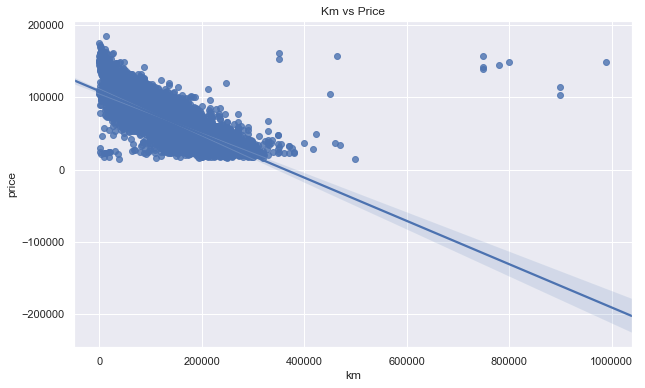

In [646]:
plt.figure(figsize=(10,6))
sns.regplot(x='km', y='price', data=df).set_title('Km vs Price')

In [647]:
df.shape

(6726, 12)

In [648]:
df = df[df.km < 400000]

In [649]:
df.shape

(6710, 12)

Text(0.5, 1.0, 'Km vs Price')

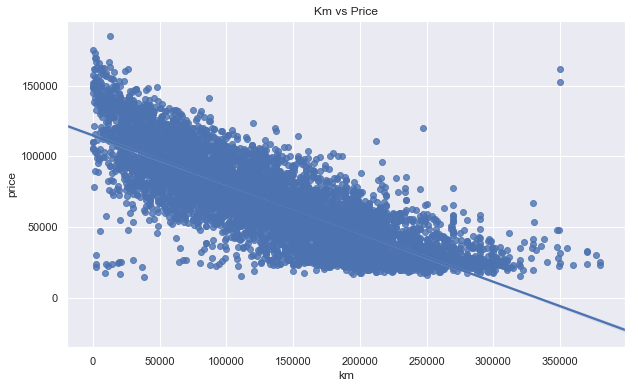

In [650]:
plt.figure(figsize=(10,6))
sns.regplot(x='km', y='price', data=df).set_title('Km vs Price')

Text(0.5, 1.0, 'Age vs Price')

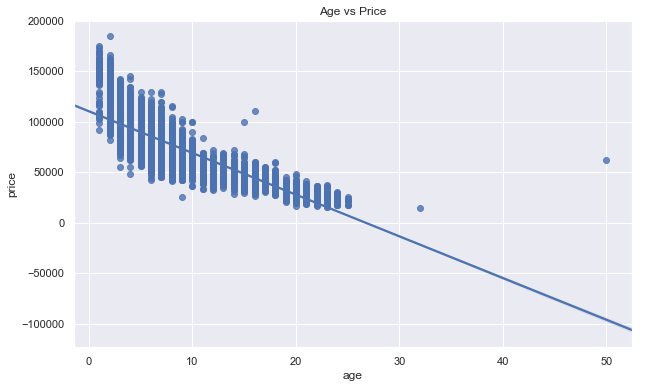

In [651]:
plt.figure(figsize=(10,6))
sns.regplot(x='age', y='price', data=df).set_title('Age vs Price')

In [652]:
df = df[df.age < 30]

Text(0.5, 1.0, 'Age vs Price')

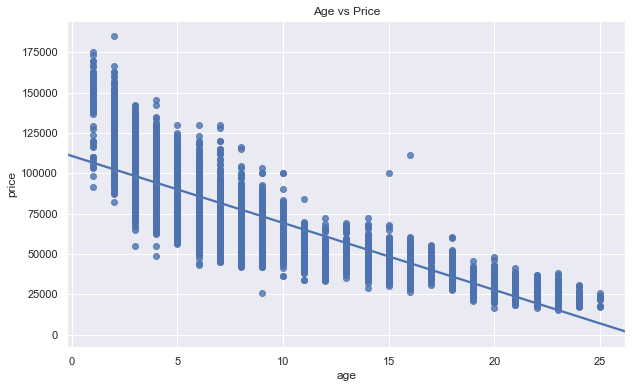

In [653]:
plt.figure(figsize=(10,6))
sns.regplot(x='age', y='price', data=df).set_title('Age vs Price')

Text(0.5, 1.0, 'Ad Duration vs Price')

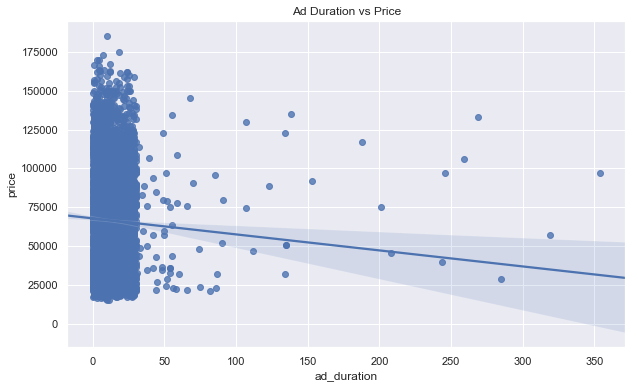

In [654]:
plt.figure(figsize=(10,6))
sns.regplot(x='ad_duration', y='price', data=df).set_title('Ad Duration vs Price')

Text(0.5, 1.0, 'Engine vs Price')

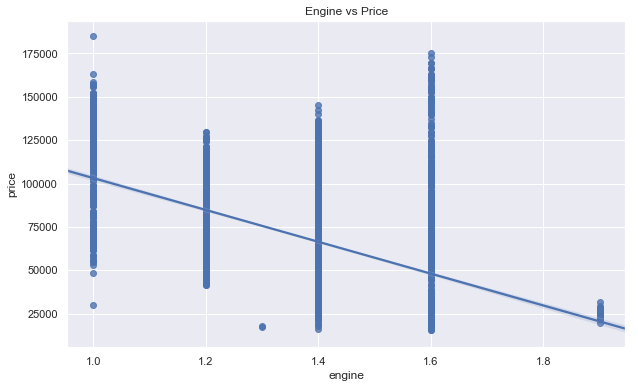

In [655]:
plt.figure(figsize=(10,6))
sns.regplot(x='engine', y='price', data=df).set_title('Engine vs Price')

### Correlation matrix

In [656]:
print(df.corr())

                 year        km     price  ad_duration       age    engine
year         1.000000 -0.745587  0.882633    -0.041150 -1.000000 -0.588472
km          -0.745587  1.000000 -0.811924     0.044801  0.745587  0.484709
price        0.882633 -0.811924  1.000000    -0.045212 -0.882633 -0.484242
ad_duration -0.041150  0.044801 -0.045212     1.000000  0.041150  0.044776
age         -1.000000  0.745587 -0.882633     0.041150  1.000000  0.588472
engine      -0.588472  0.484709 -0.484242     0.044776  0.588472  1.000000


In [657]:
corr = df.corr()

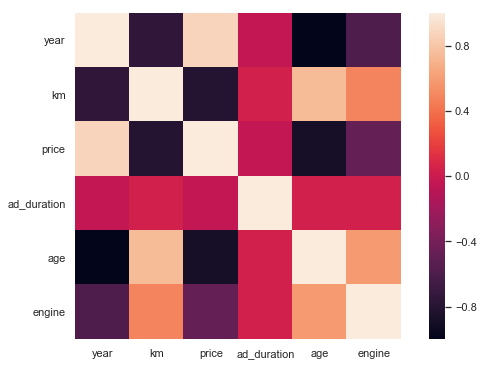

In [659]:
plt.figure(figsize=(10,6))
sns.heatmap(corr, vmax=1, square=True)

### Linear regression model

In [384]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

In [682]:
X = df[['age','km','engine','ad_duration']]
y = df['price']

In [683]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [697]:
linreg = LinearRegression()

In [698]:
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [665]:
scores = cross_val_score(linreg, X_train, y_train, cv=5)
print(np.mean(scores))

0.8341054534462613


In [675]:
scores_test = cross_val_score(linreg, X_test, y_test, cv=5)
print(np.mean(scores_test))

0.8387510302901079


In [699]:
linreg.score(X_train, y_train)

0.8351901442035045

In [700]:
linreg.score(X_test, y_test)

0.8394139260643358

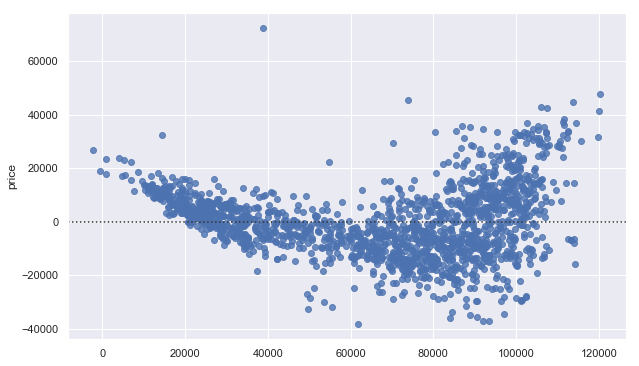

In [703]:
plt.figure(figsize=(10,6))
sns.residplot(x=y_pred, y=y_test)

### random forest regressor

In [691]:
from sklearn.ensemble import RandomForestRegressor

In [754]:
regr = RandomForestRegressor(max_depth=10, random_state=0, n_estimators=10)

In [765]:
regr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [766]:
print('R-squared score (training): {:.3f}'
     .format(regr.score(X_train, y_train)))

R-squared score (training): 0.944


In [767]:
print('R-squared score (training): {:.3f}'
     .format(regr.score(X_test, y_test)))

R-squared score (training): 0.900


In [779]:
regr.predict([[4,75000,1.2,1]])

array([99743.84587199])

### withoud ad_duration

In [759]:
X1 = df[['age','km','engine']]
y1 = df['price']

In [769]:
regr1 = RandomForestRegressor(max_depth=10, random_state=0, n_estimators=10)

In [770]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, random_state=42)

In [771]:
regr1.fit(X_train1, y_train1)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [773]:
print('R-squared score (training): {:.3f}'
     .format(regr1.score(X_train1, y_train1)))

R-squared score (training): 0.937


In [774]:
print('R-squared score (training): {:.3f}'
     .format(regr1.score(X_test1, y_test1)))

R-squared score (training): 0.898
